<a href="https://colab.research.google.com/github/21namrata/Nifty-500-comprehensive-Analysis/blob/main/nifty_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
nifty=pd.read_csv("/content/nifty_500_quarterly_results new.csv")

In [ ]:
nifty.head()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,65","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0


In [ ]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     501 non-null    object 
 1   NSE_code                 501 non-null    object 
 2   BSE_code                 501 non-null    object 
 3   sector                   501 non-null    object 
 4   industry                 501 non-null    object 
 5   revenue                  500 non-null    object 
 6   operating_expenses       500 non-null    object 
 7   operating_profit         500 non-null    object 
 8   operating_profit_margin  500 non-null    object 
 9   depreciation             500 non-null    object 
 10  interest                 500 non-null    object 
 11  profit_before_tax        500 non-null    object 
 12  tax                      500 non-null    object 
 13  net_profit               500 non-null    object 
 14  EPS                      5

In [ ]:
# turning all columns that should be numeric to numeric
for col in nifty.columns:
    if nifty[col].dtype == 'object':
        # Remove comas and symbols
        nifty[col] = nifty[col].replace({',': '', '%': ''}, regex=True)

        # try to convert to numeric, ignore if erros
        nifty[col] = pd.to_numeric(nifty[col], errors='ignore')

In [ ]:
nifty.rename(columns={"operating_profit_margin":"operating_profit_margin_%"},inplace=True)

In [ ]:
nifty.dropna(inplace=True)

In [ ]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       498 non-null    object 
 1   NSE_code                   498 non-null    object 
 2   BSE_code                   498 non-null    object 
 3   sector                     498 non-null    object 
 4   industry                   498 non-null    object 
 5   revenue                    498 non-null    float64
 6   operating_expenses         498 non-null    float64
 7   operating_profit           498 non-null    float64
 8   operating_profit_margin_%  498 non-null    float64
 9   depreciation               498 non-null    float64
 10  interest                   498 non-null    float64
 11  profit_before_tax          498 non-null    float64
 12  tax                        498 non-null    float64
 13  net_profit                 498 non-null    float64

In [ ]:
nifty.describe()

,revenue,operating_expenses,operating_profit,operating_profit_margin_%,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,7354.908434,5499.730924,1393.766466,21.770281,238.174297,816.297590,906.342570,246.643574,658.894177,15.299197,2554.334137,54.043775
std,21600.788139,17777.082278,3756.394648,30.289996,941.516430,3990.998666,2708.599941,778.672792,2055.168246,66.242224,7409.256260,193.529196
min,-167.200000,-180.100000,-508.100000,-431.870000,0.000000,0.000000,-7919.000000,-1370.600000,-8737.900000,-32.400000,-30986.800000,-214.800000
25%,780.525000,546.275000,121.275000,11.700000,14.450000,5.400000,82.675000,17.625000,62.425000,2.100000,260.250000,8.900000
50%,1699.650000,1204.650000,285.500000,18.265000,41.200000,24.250000,206.200000,48.950000,155.250000,5.350000,587.000000,22.400000
75%,4420.600000,3186.350000,822.750000,28.022500,101.275000,139.425000,594.175000,130.100000,420.850000,14.200000,1602.125000,52.675000
max,238797.000000,193988.000000,40968.000000,104.210000,12585.000000,62955.200000,26493.000000,9092.000000,17394.000000,1383.300000,69304.100000,3988.000000


In [ ]:
nifty.duplicated().sum()

0

In [ ]:
nifty.nunique()

name                         498
NSE_code                     498
BSE_code                     486
sector                        28
industry                      97
revenue                      495
operating_expenses           494
operating_profit             480
operating_profit_margin_%    460
depreciation                 396
interest                     371
profit_before_tax            486
tax                          440
net_profit                   474
EPS                          252
profit_TTM                   494
EPS_TTM                      379
dtype: int64

In [ ]:
#Saving and Downloading the final csv after cleaning
nifty.to_csv("nifty.csv",index=False)

- **Numerical** - Revenue,operating_expenses, operating_profit,
  operating_profit_margin_%, depreciation
interest, profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
- **Categorical** - sector,industry
- **Mixed** - Name

In [ ]:
nifty["sector"].value_counts()

BANKING AND FINANCE                76
GENERAL INDUSTRIALS                39
SOFTWARE & SERVICES                39
AUTOMOBILES & AUTO COMPONENTS      35
PHARMACEUTICALS & BIOTECHNOLOGY    34
CHEMICALS & PETROCHEMICALS         33
CEMENT AND CONSTRUCTION            24
DIVERSIFIED CONSUMER SERVICES      20
UTILITIES                          20
CONSUMER DURABLES                  19
METALS & MINING                    18
FMCG                               18
TEXTILES APPARELS & ACCESSORIES    15
FOOD BEVERAGES & TOBACCO           13
COMMERCIAL SERVICES & SUPPLIES     12
RETAILING                          11
REALTY                             11
OIL & GAS                          10
HOTELS RESTAURANTS & TOURISM       10
TRANSPORTATION                      9
DIVERSIFIED                         8
TELECOM SERVICES                    6
FERTILIZERS                         6
MEDIA                               5
TELECOMMUNICATIONS EQUIPMENT        3
HEALTHCARE EQUIPMENT & SUPPLIES     2
FOREST MATER

In [ ]:
nifty.head()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin_%,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,1057.0,847.4,192.1,18.48,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,4644.8,3885.4,549.3,12.39,212.8,28.9,517.7,131.5,387.9,20.7,1202.7,64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,1357.1,912.7,382.1,29.51,24.5,7.4,412.5,88.4,323.1,34.3,1216.1,128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,465.0,4305.4,325.0,7.02,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,2956.5,1026.7,647.7,25.59,0.0,1282.1,533.4,131.5,401.8,6.0,1606.2,24.0


# Overall Financial Health:
- Question: Which Nifty 500 companies demonstrate robust financial health based on revenue, operating profit, and net profit?

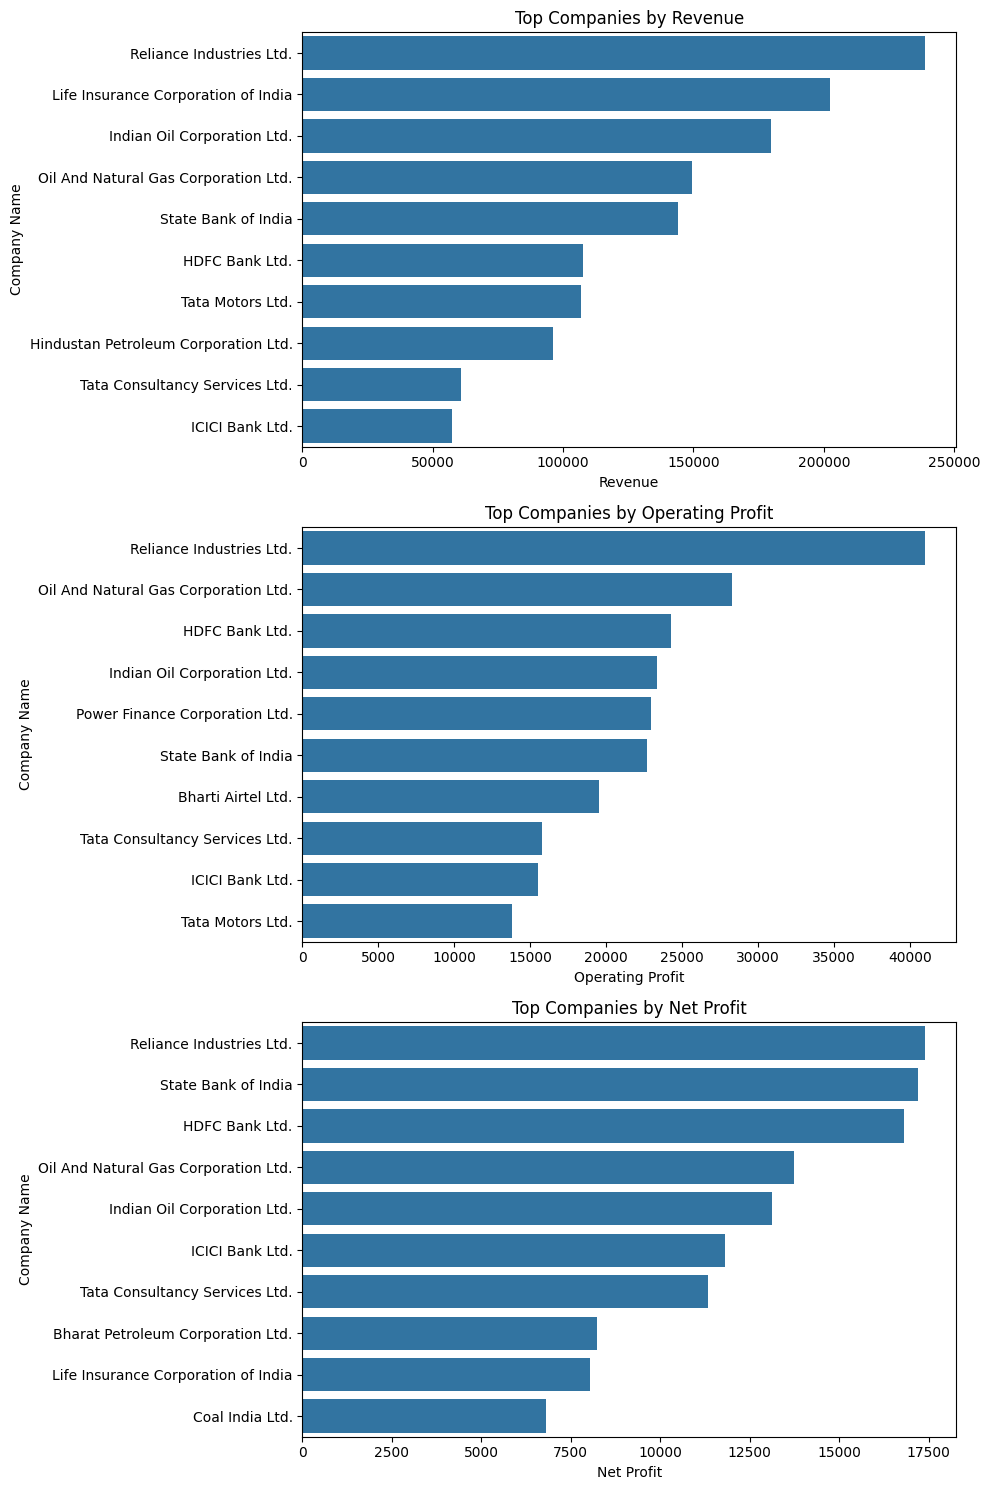

In [ ]:
# Rank companies based on selected metrics to identify top performers
nifty['revenue_rank'] = nifty['revenue'].rank(ascending=False)
nifty['operating_profit_rank'] = nifty['operating_profit'].rank(ascending=False)
nifty['net_profit_rank'] = nifty['net_profit'].rank(ascending=False)

# Select top N companies (adjust N as needed)
top_n = 10

# Create subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Bar plot for revenue
sns.barplot(x='revenue', y='name', data=nifty.sort_values('revenue_rank').head(top_n), ax=axes[0])
axes[0].set_title('Top Companies by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Company Name')

# Bar plot for operating profit
sns.barplot(x='operating_profit', y='name', data=nifty.sort_values('operating_profit_rank').head(top_n), ax=axes[1])
axes[1].set_title('Top Companies by Operating Profit')
axes[1].set_xlabel('Operating Profit')
axes[1].set_ylabel('Company Name')

# Bar plot for net profit
sns.barplot(x='net_profit', y='name', data=nifty.sort_values('net_profit_rank').head(top_n), ax=axes[2])
axes[2].set_title('Top Companies by Net Profit')
axes[2].set_xlabel('Net Profit')
axes[2].set_ylabel('Company Name')

plt.tight_layout()
plt.show()

# Sector-wise Performance Analysis:
- Question 1: which sector boasts the highest average operating profit margin?
- Question 2: How do revenue and net profit trends vary across different sectors?



<ipython-input-16-16c679a9da49>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='operating_profit_margin_%', y='sector', data=nifty_sector_opm_sorted, palette='viridis')


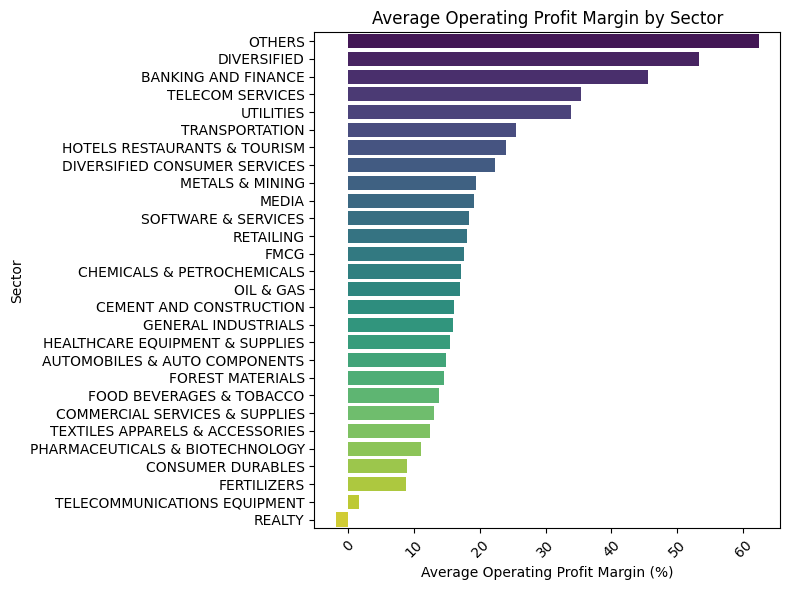

Average operating profit margin calculated and plotted for each sector.


In [ ]:
# Calculate the average operating profit margin for each sector
nifty_sector_opm = nifty.groupby('sector')['operating_profit_margin_%'].mean().reset_index()

# Sort sectors by average operating profit margin
nifty_sector_opm_sorted = nifty_sector_opm.sort_values('operating_profit_margin_%', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='operating_profit_margin_%', y='sector', data=nifty_sector_opm_sorted, palette='viridis')
plt.title('Average Operating Profit Margin by Sector')
plt.xlabel('Average Operating Profit Margin (%)')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sector_opm.png')
plt.show()
print('Average operating profit margin calculated and plotted for each sector.')

This visualization ranks sectors by their average operating profit margin, providing a clear view of which sectors are more profitable on an operating level. Sectors at the top of the chart have higher average operating profit margins, indicating more efficient operations relative to their revenue.

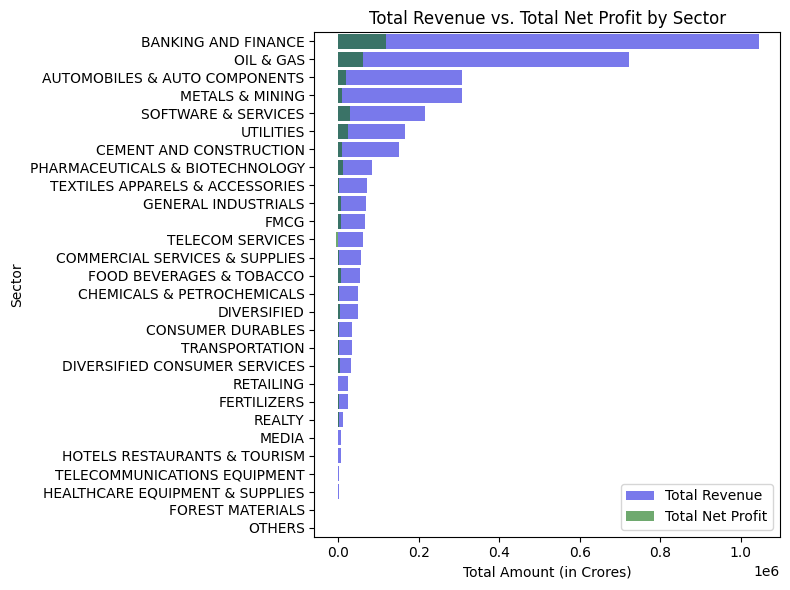

Total revenue and net profit compared across different sectors.


In [ ]:
# Calculate the total revenue and net profit for each sector
nifty_sector_revenue_profit = nifty.groupby('sector')[['revenue', 'net_profit']].sum().reset_index()

# Sort sectors by total revenue
nifty_sector_revenue_profit_sorted = nifty_sector_revenue_profit.sort_values('revenue', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='revenue', y='sector', data=nifty_sector_revenue_profit_sorted, label='Total Revenue', color='blue', alpha=0.6)
sns.barplot(x='net_profit', y='sector', data=nifty_sector_revenue_profit_sorted, label='Total Net Profit', color='green', alpha=0.6)
plt.title('Total Revenue vs. Total Net Profit by Sector')
plt.xlabel('Total Amount (in Crores)')
plt.ylabel('Sector')
plt.legend()
plt.tight_layout()
plt.savefig('sector_revenue_profit.png')
plt.show()
print('Total revenue and net profit compared across different sectors.')

This visualization contrasts the total revenue and total net profit for each sector, providing insights into the profitability and efficiency of sectors. Sectors with a high revenue but relatively low net profit may indicate high operating costs or other expenses, while sectors with closer revenue and net profit figures demonstrate efficient cost management and profitability.

# Company Performance Benchmarking:
- Question 1: Which companies within each sector exhibit top-tier net profit margins?
- Question 2: How does the Earnings Per Share (EPS) TTM compare among companies in the same industry?


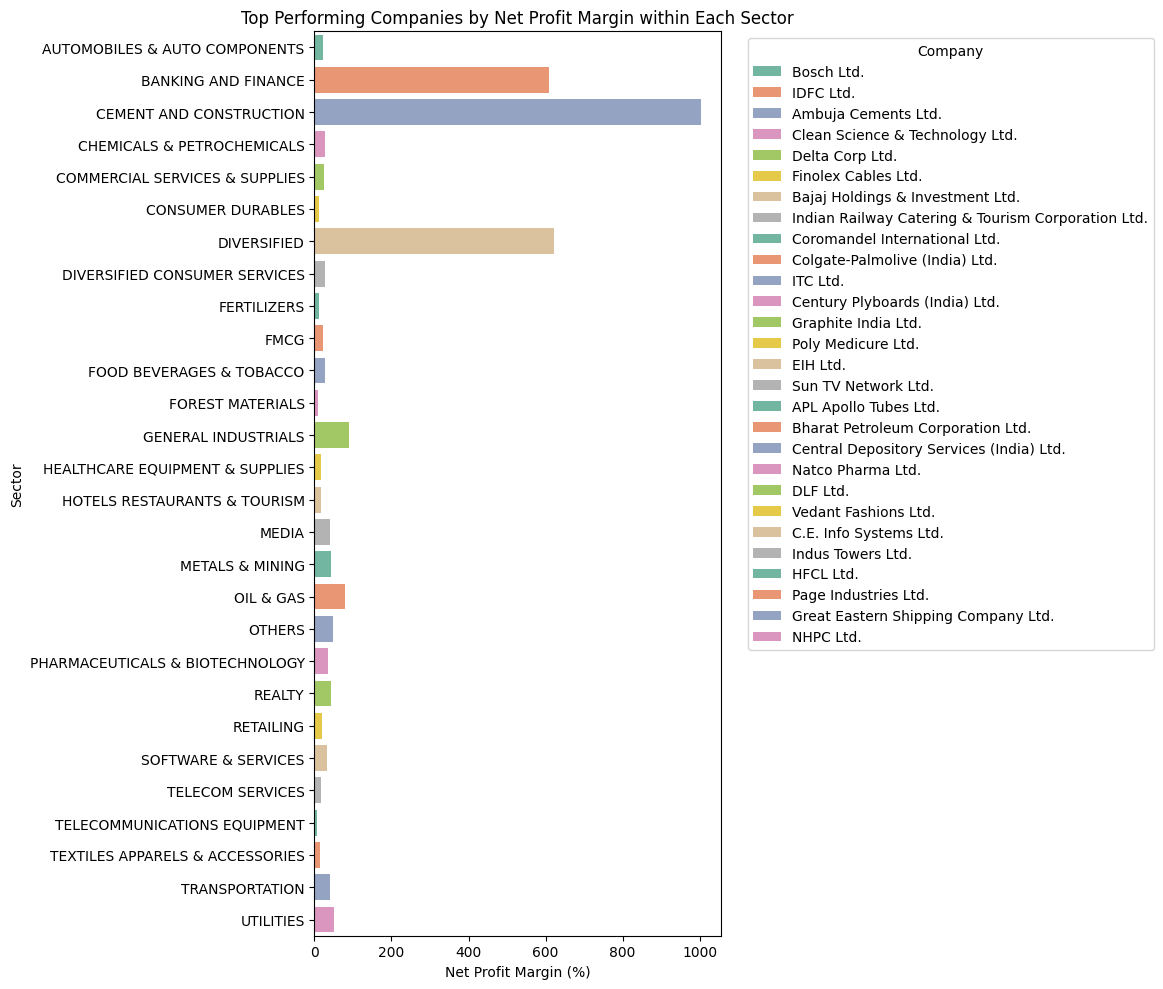

Top-performing companies by net profit margin within each sector identified and plotted.


In [ ]:
# Calculate net profit margin for each company
nifty['net_profit_margin_%'] = (nifty['net_profit'] / nifty['revenue']) * 100

# Identify top-performing companies by net profit margin within each sector
nifty_top_net_profit_margin = nifty.loc[nifty.groupby('sector')['net_profit_margin_%'].idxmax()]

# Sort the dataframe by sector and net profit margin for better visualization
nifty_top_net_profit_margin_sorted = nifty_top_net_profit_margin.sort_values(['sector', 'net_profit_margin_%'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='net_profit_margin_%', y='sector', data=nifty_top_net_profit_margin_sorted, hue='name', dodge=False, palette='Set2')
plt.title('Top Performing Companies by Net Profit Margin within Each Sector')
plt.xlabel('Net Profit Margin (%)')
plt.ylabel('Sector')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_companies_net_profit_margin.png')
plt.show()
print('Top-performing companies by net profit margin within each sector identified and plotted.')

This visualization highlights the companies with the highest net profit margin within their respective sectors, showcasing the leaders in profitability. The chart provides a clear comparison across sectors, allowing us to identify standout companies in terms of their ability to generate profit from their revenues.

<ipython-input-19-7b64e3a9c9c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EPS_TTM', y='name', data=nifty_banking_finance_sorted, palette='coolwarm')


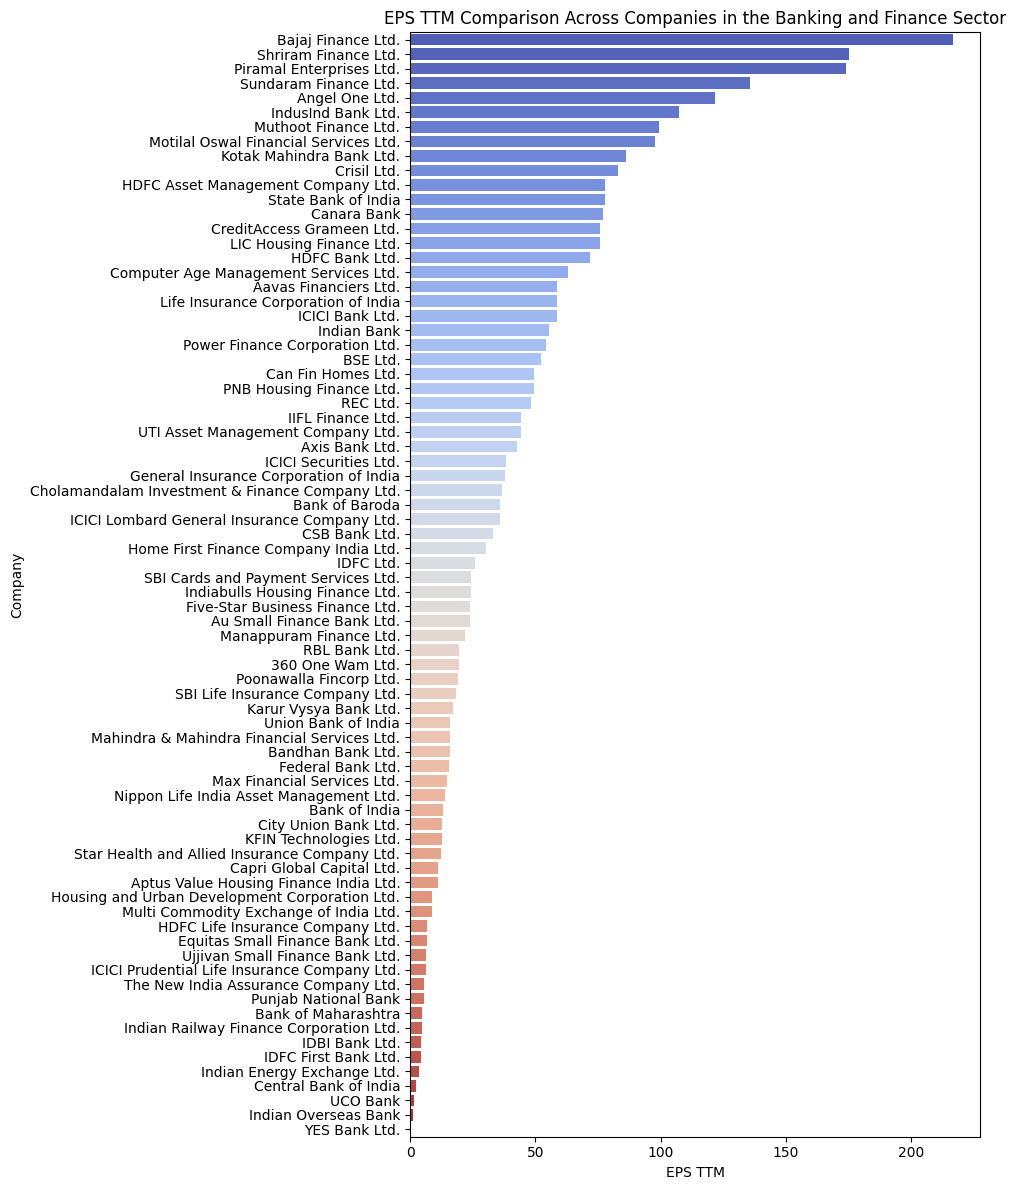

EPS TTM compared across companies in the Banking and Finance sector.


In [ ]:
# Filter for the 'BANKING AND FINANCE' sector
nifty_banking_finance = nifty[nifty['sector'] == 'BANKING AND FINANCE']

# Sort companies within the 'BANKING AND FINANCE' sector by their EPS TTM
nifty_banking_finance_sorted = nifty_banking_finance.sort_values('EPS_TTM', ascending=False)

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(x='EPS_TTM', y='name', data=nifty_banking_finance_sorted, palette='coolwarm')
plt.title('EPS TTM Comparison Across Companies in the Banking and Finance Sector')
plt.xlabel('EPS TTM')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig('banking_finance_sector_eps_comparison.png')
plt.show()
print('EPS TTM compared across companies in the Banking and Finance sector.')

This visualization displays the EPS TTM values for companies within the Banking and Finance sector, sorted in descending order. It provides a clear comparison of the companies' earnings per share over the trailing twelve months, highlighting the financial performance differences among them.

# Tax Efficiency and Risk Mitigation:
- Question: Are there companies experiencing a disproportionately high tax burden relative to net profit, indicating potential financial risk or inefficiency?

In [ ]:
# Calculate the tax burden as a percentage of net profit
nifty['tax_burden'] = (nifty['tax'] / nifty['net_profit']) * 100

# Calculate the average tax burden
average_tax_burden = nifty['tax_burden'].mean()

# Set threshold as the average tax burden
high_tax_burden_threshold = average_tax_burden

# Identify companies with a tax burden above the threshold
high_tax_burden_companies = nifty[nifty['tax_burden'] > high_tax_burden_threshold]

# Create an interactive bar plot with Plotly
fig = px.bar(
    high_tax_burden_companies,
    x='tax_burden',
    y='name',
    orientation='h',
    text='tax_burden',
    color='tax_burden',
    labels={'name': 'Company Name', 'tax_burden': 'Tax Burden (%)'},
    title='Companies with High Tax Burden Relative to Net Profit'
)

# Customize the layout
fig.update_layout(xaxis_title='Tax Burden as a Percentage of Net Profit', yaxis_title='Company Name')

# Show the interactive plot
fig.show()


# Industries with High Depreciation Expenses:
- Question: Which industries experience the highest depreciation expenses as a percentage of revenue?

<ipython-input-21-e9773393fa37>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




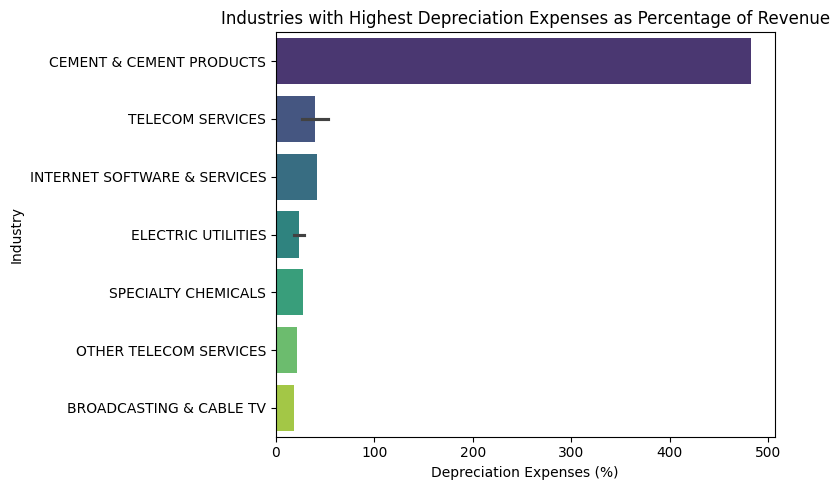

In [ ]:
nifty['depreciation_percentage'] = nifty['depreciation'] / nifty['revenue'] * 100
nifty_high_depreciation = nifty.sort_values('depreciation_percentage', ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x='depreciation_percentage', y='industry', data=nifty_high_depreciation, palette='viridis')
plt.title('Industries with Highest Depreciation Expenses as Percentage of Revenue')
plt.xlabel('Depreciation Expenses (%)')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('high_depreciation_industries.png')

# Industry-wise Performance Analysis:
- Question 1: What is the average operating profit margin for each industry?
:

In [ ]:
industries_profit_margin=nifty.groupby('industry')['operating_profit_margin_%'].mean().sort_values(ascending=False)
industries_profit_margin

industry
HOUSING FINANCE                84.526250
FINANCE (INCLUDING NBFCS)      72.693529
ASSET MANAGEMENT COS.          64.280000
INVESTMENT COMPANIES           62.400000
HOLDING COMPANIES              59.958571
                                 ...    
INTERNET & CATALOGUE RETAIL     5.350000
EDIBLE OILS                     5.160000
LIFE INSURANCE                  0.840000
REALTY                         -1.940909
TELECOM EQUIPMENT             -21.420000
Name: operating_profit_margin_%, Length: 97, dtype: float64

<ipython-input-23-f6499c5b3075>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




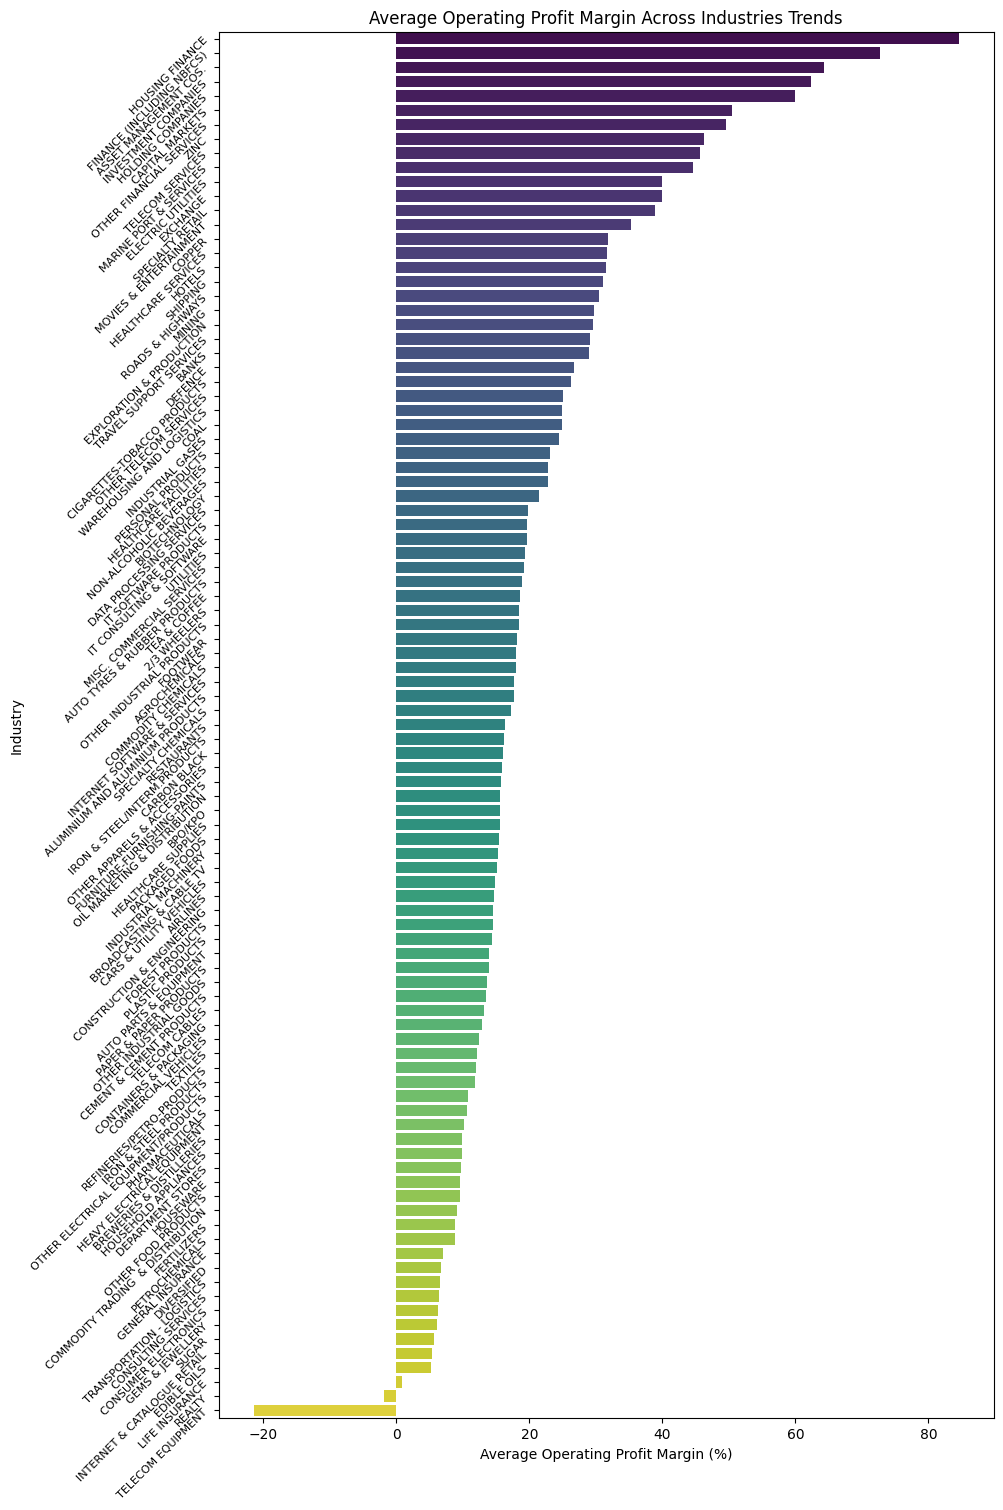

In [ ]:
plt.figure(figsize=(10, 18))
sns.barplot(x=industries_profit_margin.values, y=industries_profit_margin.index, palette='viridis')
plt.title('Average Operating Profit Margin Across Industries Trends')
plt.xlabel('Average Operating Profit Margin (%)')
plt.ylabel('Industry')
plt.yticks(rotation=45, ha='right', fontsize=8)
plt.show()

# Profit Before Tax as an Investment Indicator:
- Question: Do certain industries consistently achieve notably high or low profit before tax figures, aiding investors in identifying potential opportunities or risks?

<ipython-input-36-05ef504eb9a2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




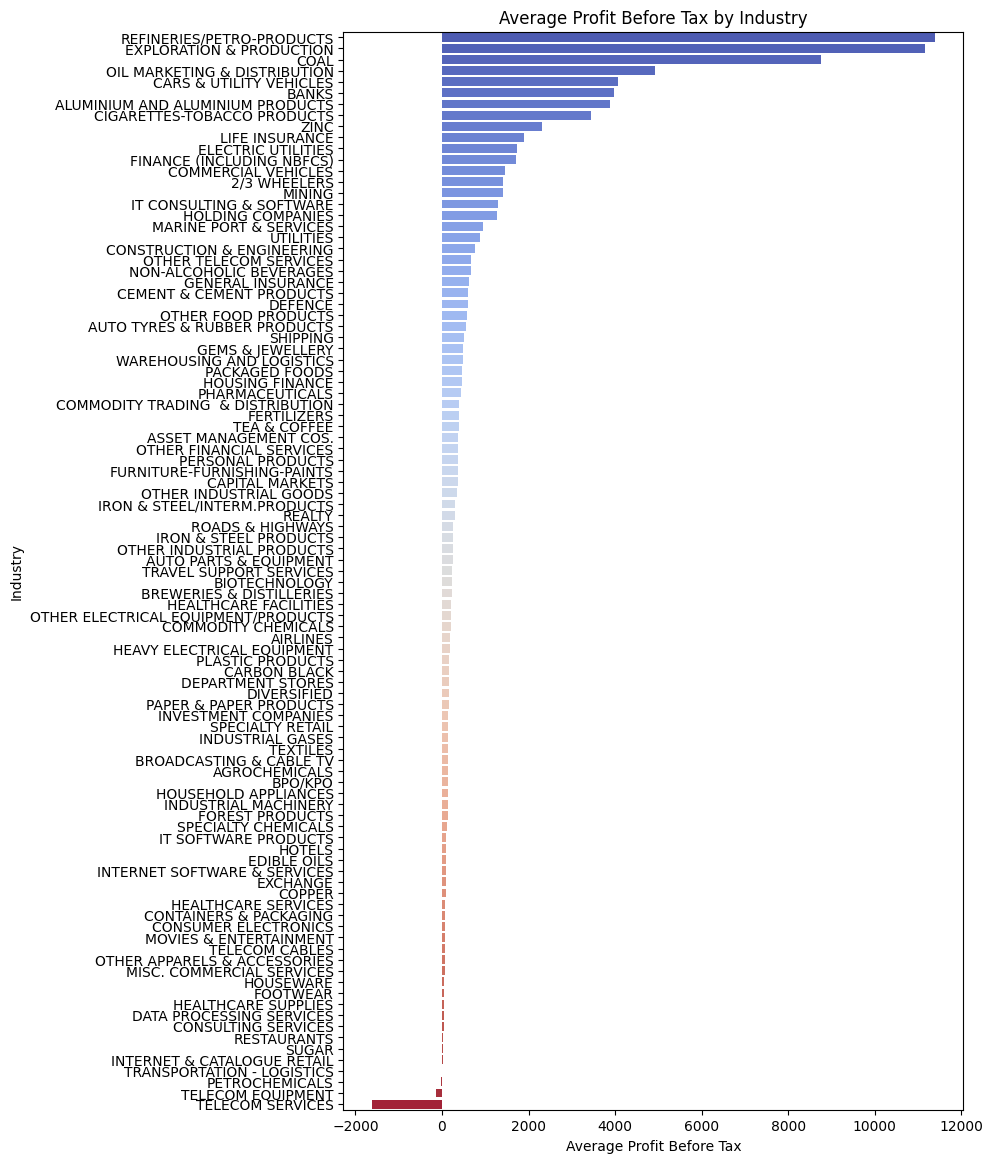

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average profit before tax by industry
avg_pbt_by_industry = nifty.groupby('industry')['profit_before_tax'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 14))
sns.barplot(x=avg_pbt_by_industry.values, y=avg_pbt_by_industry.index, palette='coolwarm')
plt.xlabel('Average Profit Before Tax')
plt.ylabel('Industry')
plt.title('Average Profit Before Tax by Industry')
plt.show()